In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Image, Cube
from mpdaf.sdetect import Catalog

import muse_origin
from muse_origin import ORIGIN

from astropy.io import fits

print(muse_origin.__version__)


None


In [38]:
DATACUBE = '../data/MAGPI1202_updated.fits'
NAME = 'MAGPI1202-test'

cube = Cube(DATACUBE)

In [7]:
from mpdaf.MUSE import create_psf_cube
from mpdaf.obj import Image, WCS
from mpdaf.MUSE import FSFModel, MoffatModel2

In [14]:
ra,dec = (175.3400982, -1.5896880)
fsf = MoffatModel2.from_starfit(cube, (dec,ra), fwhmdeg=3, betadeg=2)

[INFO] FSF from star fit at Ra: 175.34010 Dec: -1.58969 Size 5.0 Nslice 20 FWHM poly deg 3 BETA poly deg 2
[DEBUG] getting 20 images around object ra:-1.589688 dec:175.340098
[DEBUG] -- First fit on white light image
[DEBUG] RA: 175.34008 DEC: -1.58966 FWHM 0.60 BETA 2.18 PEAK 631.1 BACK 0.2
[DEBUG] -- Second fit on all images
[DEBUG] 1 RA: 175.34008 DEC: -1.58967 FWHM 0.70 BETA 2.21 PEAK 504.2 BACK 0.1
[DEBUG] 2 RA: 175.34008 DEC: -1.58966 FWHM 0.70 BETA 2.26 PEAK 478.6 BACK 0.1
[DEBUG] 3 RA: 175.34008 DEC: -1.58966 FWHM 0.69 BETA 2.26 PEAK 507.4 BACK 0.1
[DEBUG] 4 RA: 175.34008 DEC: -1.58966 FWHM 0.67 BETA 2.23 PEAK 583.9 BACK 0.1
[DEBUG] 5 RA: 175.34008 DEC: -1.58966 FWHM 0.66 BETA 2.22 PEAK 629.4 BACK 0.1
[DEBUG] 6 RA: 175.34008 DEC: -1.58966 FWHM 0.66 BETA 2.30 PEAK 639.1 BACK 0.2
[DEBUG] 7 RA: 175.34008 DEC: -1.58966 FWHM 0.65 BETA 2.31 PEAK 631.1 BACK 0.3
[DEBUG] 8 RA: 175.34008 DEC: -1.58966 FWHM 0.64 BETA 2.26 PEAK 650.6 BACK 0.3
[DEBUG] 9 RA: 175.34008 DEC: -1.58966 FWHM 0.62

(2.0, 3.0)

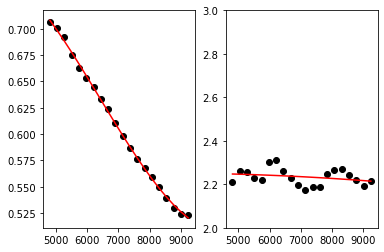

In [15]:
fig,ax = plt.subplots(1,2)
ax[0].plot(fsf.fit['wave'], fsf.fit['fwhmfit'], 'ok')
ax[0].plot(fsf.fit['wave'], fsf.fit['fwhmpol'], '-r')
ax[1].plot(fsf.fit['wave'], fsf.fit['betafit'], 'ok')
ax[1].plot(fsf.fit['wave'], fsf.fit['betapol'], '-r')
ax[1].set_ylim(2,3)

In [28]:
dir(fsf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_convolve_one',
 'beta_pol',
 'convolve',
 'field',
 'fit',
 'from_header',
 'from_hstconv',
 'from_psfrec',
 'from_starfit',
 'fwhm_pol',
 'get_2darray',
 'get_3darray',
 'get_beta',
 'get_cube',
 'get_fwhm',
 'get_image',
 'info',
 'lbrange',
 'logger',
 'model',
 'name',
 'pixstep',
 'read',
 'to_header']

In [30]:
fsf.to_header()

FSFMODE =                    2 / Circular MOFFAT beta=poly(lbda) fwhm=poly(lbda)
FSFLB1  =                 5000 / FSF Blue Ref Wave (A)                          
FSFLB2  =                 9000 / FSF Red Ref Wave (A)                           
FSF00FNC=                    4 / FSF00 FWHM Poly Ncoef                          
FSF00F00=  0.07152842374507756 / FSF00 FWHM Poly C00                            
FSF00F01=   0.0311987240583495 / FSF00 FWHM Poly C01                            
FSF00F02=  -0.1919591188186724 / FSF00 FWHM Poly C02                            
FSF00F03=   0.6055361503239342 / FSF00 FWHM Poly C03                            
FSF00BNC=                    3 / FSF00 BETA Poly Ncoef                          
FSF00B00= -0.01332009386949392 / FSF00 BETA Poly C00                            
FSF00B01= -0.02958730102795802 / FSF00 BETA Poly C01                            
FSF00B02=    2.235170918688337 / FSF00 BETA Poly C02                            

In [31]:
# eps = fits.open(DATACUBE)
# eps[0].header = eps[0].header + fsf.to_header()

# eps.writeto('../data/MAGPI1202_updated.fits')

In [39]:
orig = ORIGIN(DATACUBE, name='origtest' )

INFO : Step 00 - Initialization (ORIGIN vNone)
INFO : Read the Data Cube ../data/MAGPI1202_updated.fits
INFO : Compute FSFs from the datacube FITS header keywords
INFO : mean FWHM of the FSFs = 3.04 pixels


INFO : 00 Done


In [ ]:
orig.step01_preprocessing()

INFO : Step 01 - Preprocessing
DEBUG:    - dct_order = '' (default: 10)
DEBUG:    - dct_approx = '' (default: False)
DEBUG:    - pfasegcont = '' (default: 0.01)
DEBUG:    - pfasegres = '' (default: 0.01)
DEBUG:    - local_max_size = '' (default: 3)
DEBUG:    - bins = '' (default: 'fd')
INFO : DCT computation



DEBUG: dct_residual executed in 56.0s
INFO : Data standardizing


In [65]:
DATACUBE = '../../muse/data/mxdf/0.8/DATACUBE_MXDF_ZAP_COR_V2.fits'
NAME = 'MXDF-test'

In [66]:
from mpdaf.MUSE import FSFModel

fsfmodel = FSFModel.read(DATACUBE)


In [79]:
dir(fsfmodel)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_convolve_one',
 'beta_pol',
 'convolve',
 'field',
 'from_header',
 'from_hstconv',
 'from_psfrec',
 'from_starfit',
 'fwhm_pol',
 'get_2darray',
 'get_3darray',
 'get_beta',
 'get_cube',
 'get_fwhm',
 'get_image',
 'info',
 'lbrange',
 'logger',
 'model',
 'name',
 'pixstep',
 'read',
 'to_header']

In [88]:
fsfmodel.pixstep

0.2000000000000016

In [69]:
fsfmodel.to_header(DATACUBE)

TypeError: 'str' object does not support item assignment

In [86]:
wave = np.arange(4700.00, 9351.25+1.25, 1.25 )

array([0.59511559, 0.59511531, 0.59511489, ..., 0.39697273, 0.39698018,
       0.39698776])

In [63]:
galaxy_cube.primary_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2021-02-02T04:38:02' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =           212.304518 / [deg] 14:09:13.0 RA (J2000) pointing           
DEC     =              1.78248 / [deg] 01:46:56.9 DEC (J2000) pointing          
EQUINOX =                200

In [49]:
psf_cube = create_psf_cube((3722,13,13), np.empty(galaxy_cube.shape[0])+0.5,wcs = galaxy_cube.wcs,  unit_fwhm='arcsec' )



In [81]:
orig = ORIGIN.init(DATACUBE, name=NAME, loglevel='DEBUG', logcolor=True, PSF = 'test', 
                  FWHM_PSF=fsfmodel.get_fwhm(wave),  )

INFO: Step 00 - Initialization (ORIGIN vNone)
INFO: Read the Data Cube ../data/GAMAJ140913_combine.fits
INFO: Compute FSFs from the datacube FITS header keywords


ValueError: missing PSF keywords in the cube FITS header

In [57]:
orig

In [20]:
len(fsfmodel.to_header())

8